In [1]:
import tensorflow as tf
import os
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Preprocessing the Dataset

In [2]:
import os

base_dir = 'Dataset Bangkit\Train'

Alergi_dir = os.path.join(base_dir, 'Alergi-Train')
Antibiotik_dir = os.path.join(base_dir, 'Antibiotik-Train')
Maag_dir = os.path.join(base_dir, 'Maag-Train')
Paracetamol_dir = os.path.join(base_dir, 'Paracetamol-Train')
Vitamin_dir = os.path.join(base_dir, 'Vitamin-Train')

print('total training Obat Alergi images:', len(os.listdir(Alergi_dir)))
print('total training Obat Antibiotik images:', len(os.listdir(Antibiotik_dir)))
print('total training Obat Maag images:', len(os.listdir(Maag_dir)))
print('total training Obat Paracetamol images:', len(os.listdir(Paracetamol_dir)))
print('total training Vitamin images:', len(os.listdir(Vitamin_dir)))

Alergi_files = os.listdir(Alergi_dir)
print(Alergi_files[:10])

Antibiotik_files = os.listdir(Antibiotik_dir)
print(Antibiotik_files[:10])

Maag_files = os.listdir(Maag_dir)
print(Maag_files[:10])

Paracetamol_files = os.listdir(Paracetamol_dir)
print(Paracetamol_files[:10])

Vitamin_files = os.listdir(Vitamin_dir)
print(Vitamin_files[:10])

total training Obat Alergi images: 16
total training Obat Antibiotik images: 15
total training Obat Maag images: 17
total training Obat Paracetamol images: 22
total training Vitamin images: 16
['alergi (1).jpg', 'alergi (10).jpg', 'alergi (11).jpg', 'alergi (12).jpg', 'alergi (13).jpg', 'alergi (14).jpg', 'alergi (15).jpg', 'alergi (16).jpg', 'alergi (2).jpg', 'alergi (3).jpg']
['antibiotik (1).jpg', 'antibiotik (10).jpg', 'antibiotik (11).jpg', 'antibiotik (12).jpg', 'antibiotik (13).jpg', 'antibiotik (14).jpg', 'antibiotik (15).jpg', 'antibiotik (2).jpg', 'antibiotik (3).jpg', 'antibiotik (4).jpg']
['maag (1).jpg', 'maag (10).jpg', 'maag (11).jpg', 'maag (12).jpg', 'maag (13).jpg', 'maag (14).jpg', 'maag (15).jpg', 'maag (16).jpg', 'maag (17).jpg', 'maag (2).jpg']
['paracetamol (1).jpg', 'paracetamol (10).jpg', 'paracetamol (11).jpg', 'paracetamol (12).jpg', 'paracetamol (13).jpg', 'paracetamol (14).jpg', 'paracetamol (15).jpg', 'paracetamol (16).jpg', 'paracetamol (17).jpg', 'parace

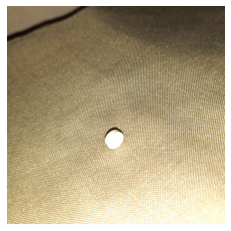

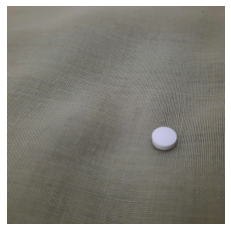

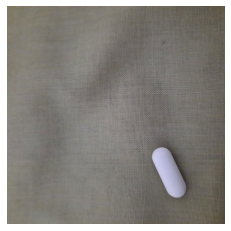

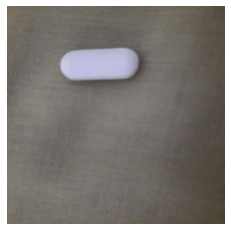

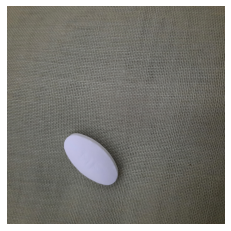

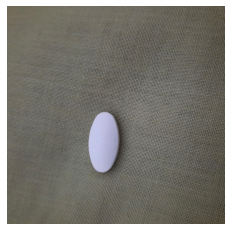

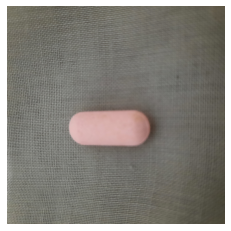

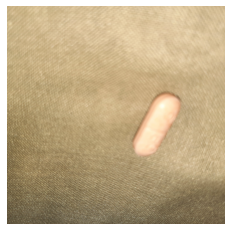

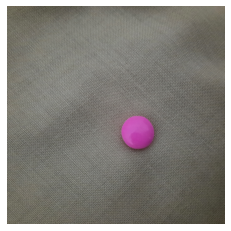

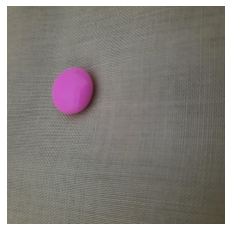

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_Alergi = [os.path.join(Alergi_dir, fname) 
                for fname in Alergi_files[pic_index-2:pic_index]]
next_Antibiotik = [os.path.join(Antibiotik_dir, fname) 
                for fname in Antibiotik_files[pic_index-2:pic_index]]
next_Maag = [os.path.join(Maag_dir, fname) 
                for fname in Maag_files[pic_index-2:pic_index]]
next_Paracetamol = [os.path.join(Paracetamol_dir, fname) 
                for fname in Paracetamol_files[pic_index-2:pic_index]]
next_Vitamin = [os.path.join(Vitamin_dir, fname) 
                for fname in Vitamin_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_Alergi+next_Antibiotik+next_Maag+next_Paracetamol+next_Vitamin):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

TensorFlow Model Sequential

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               42467840  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2

TensorFlow Training Parameter

In [5]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [6]:
TRAINING_DIR = "Dataset Bangkit\Train" #GANTI
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "Dataset Bangkit\Test"  #GANTI
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=25
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=25
)

Found 86 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


Train Model

In [10]:
history = model.fit(train_generator, epochs=60, steps_per_epoch=1, validation_data = validation_generator, verbose = 1, validation_steps=1)

Epoch 1/60
1/1 [==============================] - 19s 19s/step - loss: 1.3099 - accuracy: 0.5200 - val_loss: 1.2992 - val_accuracy: 0.4000
Epoch 2/60
1/1 [==============================] - 7s 7s/step - loss: 1.2460 - accuracy: 0.5455 - val_loss: 1.2901 - val_accuracy: 0.3600
Epoch 3/60
1/1 [==============================] - 9s 9s/step - loss: 1.2376 - accuracy: 0.4545 - val_loss: 1.4135 - val_accuracy: 0.4000
Epoch 4/60
1/1 [==============================] - 20s 20s/step - loss: 1.6198 - accuracy: 0.1600 - val_loss: 1.2694 - val_accuracy: 0.3600
Epoch 5/60
1/1 [==============================] - 21s 21s/step - loss: 1.1938 - accuracy: 0.4400 - val_loss: 1.4264 - val_accuracy: 0.2400
Epoch 6/60
1/1 [==============================] - 27s 27s/step - loss: 1.2057 - accuracy: 0.3600 - val_loss: 1.2495 - val_accuracy: 0.4000
Epoch 7/60
1/1 [==============================] - 17s 17s/step - loss: 0.7986 - accuracy: 0.8182 - val_loss: 1.5597 - val_accuracy: 0.2000
Epoch 8/60
1/1 [===============

Result Plot

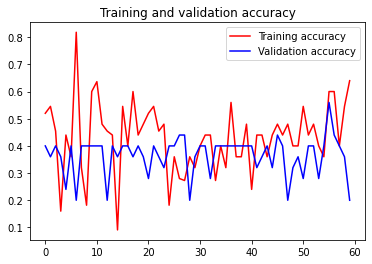

<Figure size 432x288 with 0 Axes>

In [11]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [12]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmp4474p6d7\assets
